In [13]:
from IPython.display import display, HTML
import numpy as np
div_to_color = {'0': '#FFFFFF',
                '1': '#e0e0e0',
                '2': '#DFFF00',
                '3': '#9FE2BF',
                '4': '#CCCCFF',
                '5': '#FFE4E1',
                '6': '#FF00FF',
                '7': '#e3abfb',    
                '8': '#FFBF00',
                '9': '#BBBAFF',
                '10': '#FFC2E2',
                '11': '#F4FDB1',
                '12': '#7C8BFF',
                '13': '#95FFF7',
                '14': '#FF5733',
                '15': '#33FF4C',
                '16': '#7733FF',
                '17': '#B2FF33',
                '18': '#33FF83', 
                '19': '#FF3371', 
                '20': '#33F3FF',
                '21': '#8AFF33',
                '22': '#33FFC1',
                '23': '#AF33FF',
                '24': '#FFD433',
                '25': '#33ACFF',
                '26': '#BDAACF',
                '27': '#ACE6DA',
                '28': '#CCCCFF',
                '29': '#FFE4E1',
                '30': '#FF00FF',
                '31': '#e3abfb',    
                '32': '#FFBF00',
                '33': '#BBBAFF',
}

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


def color_html(label):
    return f'<span style="background-color:{div_to_color[label]} ">'

def display_HTML(text, div, offset=False, one_color=False, red_chars=False):
    displayed_text = ''
    user_displayed_text = ''
    previous = 'eq'
    mark_end = '</span>'
    previous_label = 0
    for token, label in zip(text.split(' '), div.split(' ')):
        print(label)
        if one_color:
            if int(label) > 0:
                label = '1'
        if offset:
            if label != '0':
                label = str(int(label)  + 1)
        mark = color_html(label)
        if label == '0':
            displayed_text += f' {token}'
            if previous == 'div':
                user_displayed_text += f'</h-l-{str(int(previous_label)-1)}> {token}'
            else:
                user_displayed_text += f' {token}'
            previous = 'eq'
        else:
            if previous == 'div' and int(label)==previous_label:
                displayed_text += f'{mark} {token}{mark_end}'
                user_displayed_text += f' {token}'
            else:
                if int(label)!=previous_label and int(label) > 2 and previous_label!=0:
                    user_displayed_text += f' </h-l-{str(int(label)-2)}>'
                displayed_text += f' {mark}{token}{mark_end}'
                user_displayed_text += f' <h-l-{str(int(label)-1)}>{token}'
            previous = 'div'
        previous_label = int(label)

    if red_chars:
        displayed_text = f'{bcolors.WARNING} {displayed_text} {bcolors.ENDC}'
    
    if previous == 'div':
        user_displayed_text += f'</h-l-{str(int(previous_label)-1)}>'
        
        
    return display(HTML(displayed_text)), user_displayed_text

def add_lists(list_a, list_b):
    #print(list_b)
    #print(list_a)
    #print('as')
    list_add = []
    for (a, b) in zip(list_a, list_b):
        list_add.append(a+b)
    return list_add

In [2]:
processes, processes_set = [], set()
with open('annotations/limsi', 'r') as file_:
    lines = file_.readlines()
    for line in lines:
        line = line.rstrip().split('\t')[-1]
        if '0' in line:
            processes.append(['literal'])
        else:
            processes.append(line.split(' '))
        for a  in line.split(' '):
            processes_set.add(a)

In [3]:
processes_set

{'0',
 'equivalence',
 'generalization',
 'idiom',
 'lexical_shift',
 'metaphor',
 'modulation',
 'modulation_transposition',
 'particularization',
 'translation_error',
 'transposition',
 'unaligned',
 'unaligned_explicitation',
 'unaligned_reduction',
 'uncertain',
 'unspec'}

In [5]:
files_ = ['missing_paired_phrases_filtering_ngrams_2', 'missing_paired_phrases_filtering_ngrams_3', 'missing_paired_phrases_filtering_ngrams_4', 'missing_paired_phrases_filtering_ngrams_5', 'missing_paired_phrases_filtering_ngrams_6', 'missing_paired_phrases_filtering_ngrams_7', 'missing_paired_phrases_filtering_ngrams_8', 'missing_paired_phrases_filtering_ngrams_9', 'missing_paired_phrases_filtering_ngrams_10', 'missing_paired_phrases_filtering' , 'missing_paired_phrases_filtering_2_3' , 'missing_paired_phrases'] 

files_ = ['missing_paired_pos_phrases']
#files_ = ['limsi_missing_paired_phrases_filtering_2_3']
show_ = True
literal_scores = []
count = 0
improved = 0
neg_15_neg_10, neg_10_neg_5, neg_5_0, pos_0_pos_5, pos_5_pos_10, pos_10_pos_15 = [],[], [], [], [], []
original_scores, final_scores =[], []
for file_ in files_:
    with open(f'outputs/{file_}', 'r') as out_:
        c = 0
        lines = out_.readlines()
        for threshold_gold in [0]:
            for id_, line in enumerate(lines):
                    scores, score_color = [], []
                    c += 1
                    #if c !=3:
                    #    continue
                    #if 120 > c or c > 130:
                    #    continue
                
                    line = line.split('\t')
                    gold_a = np.array([float(x) for x in line[2].split(' ')])
                    gold_b = np.array([float(x) for x in line[3].split(' ')])
                    raw_a = np.array([float(x) for x in line[4].split(' ')])
                    raw_b = np.array([float(x) for x in line[5].split(' ')])
                    
                    
                    gold_a_ = np.where(gold_a > threshold_gold, 1, 0)
                    gold_b_ = np.where(gold_b > threshold_gold, 1, 0)
                    #print(gold_a_)
                    #print(sum(gold_a_))
                    #if len(line[0].split(' ')) < 20:
                    #    continue
                    
                    #if sum(gold_a_)/len(gold_a) > 0.1:
                    #    continue
                    
                    #if sum(raw_a) == len(raw_a)  or sum(raw_b) == len(raw_b):
                    #    continue
        
                    original_score = float(line[4])
            
            
                    if original_score < -10:
                        neg_15_neg_10.extend(processes[id_])
                    elif original_score < -5:
                        neg_10_neg_5.extend(processes[id_])
                    elif original_score < 0:
                        neg_5_0.extend(processes[id_])
                    elif original_score < 5: 
                        pos_0_pos_5.extend(processes[id_])
                    elif original_score < 10:
                        pos_5_pos_10.extend(processes[id_])
                    else:
                        pos_10_pos_15.extend(processes[id_])
                        
                    if original_score > 0:
                        continue

                    
                    count += 1
                    original_scores.append(original_score)
                    revisions = int(line[5])
                    #all_revisions.append(revisions)
                    
                    previous_score = original_score
                    expl_a = [0] * len(gold_a)
                    expl_b = [0] * len(gold_b)
                    
                    scores.append(str(original_score))
                    score_color = '1'
                    
                    #if (sum(gold_a_) > (len(gold_a_)*0.5)) or (sum(gold_b_) > (len(gold_b_)*0.5)) :
                    #    continue
                        
                    #print(f'{len(gold_a_)} {sum(gold_a_)}' )
                    
                    for i in range(revisions):                        
                        score = line[5 + 3*i + 1]               
                        if float(score) - float(previous_score) < 1:
                            break
                        #print([((i +1)*int(a)) for a in line[5 + 3*i + 2].split(' ')])
                        expl_a = add_lists(expl_a, [((i +1)*int(a)) for a in line[5 + 3*i + 2].split(' ')])
                        expl_b = add_lists(expl_b, [((i +1)*int(a)) for a in line[5 + 3*i + 3].split(' ')])
    
                        previous_score = score
                        scores.append(str(score))
                        score_color += f' {str(i+2)}'
                    
                    improved +=1
                    final_scores.append(score[-1])
                    if show_: 
                        target = 'unaligned_reduction'
                    #if target in processes[id_]:
       
                        print(f'____________________________________{id_}___________________________________________________')
                        #print(processes[id_].index(target))
                        #print(processes[id_])

                        #display_HTML(' '.join(scores), ' '.join(score_color.split(' ')))
                        # Activate only target class
                        #activate_en = [0]*len(line[2])
                        #activate_fr = [0]*len(line[3])
                        
                        #for ann_id,ann in enumerate(line[2].split(' ')):
                        #    if int(ann) == processes[id_].index(target) + 1:
                        #        activate_en[ann_id] = 2
                        
                        #for ann_id,ann in enumerate(line[3].split(' ')):
                        #    if int(ann) == processes[id_].index(target) + 1:
                        #        activate_fr[ann_id] = 2

                        #display_HTML(line[0], ' '.join([str(x) for x in activate_en]), offset=False)#, one_color=True)
                        #display_HTML(line[1], ' '.join([str(x) for x in activate_fr]), offset=False)#, one_color=True)

                        display_HTML(line[0], line[2], offset=False)#, one_color=True)
                        display_HTML(line[1], line[3], offset=False)#, one_color=True)

                        
                        print('-  -'*25)
                        display_HTML(' '.join(scores), ' '.join(score_color.split(' ')))



                        display_HTML(line[0], ' '.join([str(x) for x in expl_a]), offset=True)
                        display_HTML(line[1], ' '.join([str(x) for x in expl_b]), offset=True) 
                    
                    #print('-'*100)
print(count)

____________________________________0___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________2___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________3___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________4___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________5___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________6___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________7___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________11___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________12___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________14___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________15___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________16___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________17___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________18___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________19___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________20___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________21___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________22___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________24___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________25___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________26___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________27___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________28___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________29___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________30___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________31___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________32___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________33___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________34___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________35___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________36___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________37___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________38___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________40___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________41___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________42___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________43___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________45___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________46___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________48___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________49___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________50___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________51___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________52___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________53___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________54___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________56___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________57___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________58___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________59___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________60___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________61___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________62___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________64___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________65___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________66___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________67___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________68___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________69___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________70___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________71___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________72___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________73___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________75___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________76___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________77___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________78___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________79___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________80___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________81___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________82___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________83___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________84___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________85___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________86___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________88___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________89___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________90___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________91___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________92___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________94___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________97___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________98___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________99___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________100___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________101___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________102___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________103___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________104___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________105___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________106___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________108___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________110___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________111___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________112___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________113___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________114___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________115___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________116___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________118___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________119___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________121___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________122___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________123___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________124___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________125___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________126___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________127___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________128___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________129___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________130___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________131___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________132___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________133___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________134___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________135___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________136___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________137___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________138___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________140___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________141___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________142___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________143___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________144___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________145___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________146___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________148___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________150___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________151___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________152___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________154___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________155___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________156___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________157___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________158___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________159___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________160___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________161___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________162___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________163___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________164___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________165___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________166___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________167___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________168___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________169___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________170___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________172___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________173___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________174___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________175___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________176___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________177___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________178___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________179___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________180___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________181___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________182___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________183___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________185___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________186___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________187___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________188___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________189___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________190___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________191___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________192___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________193___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________194___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________196___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________197___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________198___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________199___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________200___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________201___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________202___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________203___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________204___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________205___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________206___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________207___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________208___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________209___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________210___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________211___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________212___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________213___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________214___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________215___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________217___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________218___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________219___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________220___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________221___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________224___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________225___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________226___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________227___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________228___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________229___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________230___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________231___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________232___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________233___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________234___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________235___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________236___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________237___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________238___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________239___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________241___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________242___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________243___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________244___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________245___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________246___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________247___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________248___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________249___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________250___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________252___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________253___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________254___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________255___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________256___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________257___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________258___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________259___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________260___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________261___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________262___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________263___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________264___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________265___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________267___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________268___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________271___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________272___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________273___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________274___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________275___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________276___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________277___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________278___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________279___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________280___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________281___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________282___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________283___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________285___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________286___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________287___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________288___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________289___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________290___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________291___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________293___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________295___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________296___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________297___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________298___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________299___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________300___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________301___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________303___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________304___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________305___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________306___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________308___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________309___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________310___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________311___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________312___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________313___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________314___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________315___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________316___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________317___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________318___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________319___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________320___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________321___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________322___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________324___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________325___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________326___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________327___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________328___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________329___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________330___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________332___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________333___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________334___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________335___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________337___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________338___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________339___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________340___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________341___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________342___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________343___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________344___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________345___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________347___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________348___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________350___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________352___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________353___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________354___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________355___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________356___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________357___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________358___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________359___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________361___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________362___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________363___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________364___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________365___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________366___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________368___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________369___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________370___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________371___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________373___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________374___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________375___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________376___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________378___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________380___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________381___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________382___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________383___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________384___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________387___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________388___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________390___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________391___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________392___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________393___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________394___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________396___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________397___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________398___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________399___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________400___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________401___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________402___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________403___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________404___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________405___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________406___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________407___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________409___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________410___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________411___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________412___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________414___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________415___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


____________________________________416___________________________________________________


-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


360


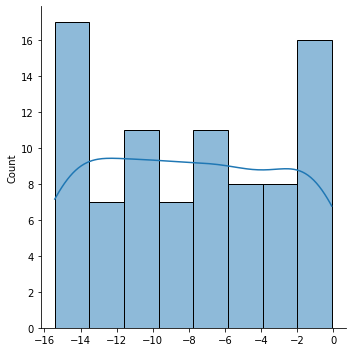

In [8]:
import seaborn as sns
sns.displot(original_scores, kde=True)
#sns.displot(final_scores, kde=True)

In [12]:
count

130

In [13]:
improved

130

/fs/clip-xling/projects/semdiv/anaconda3/envs/semdiv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

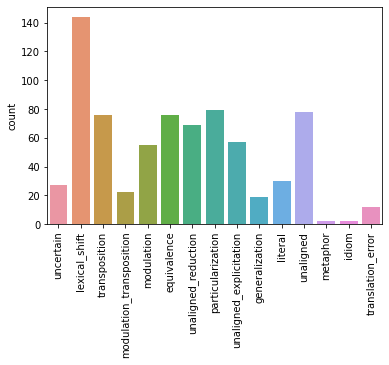

In [7]:
import matplotlib.pyplot as plt

plt.xticks(rotation = 90) #
sns.countplot(neg_15_neg_10)

/fs/clip-xling/projects/semdiv/anaconda3/envs/semdiv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

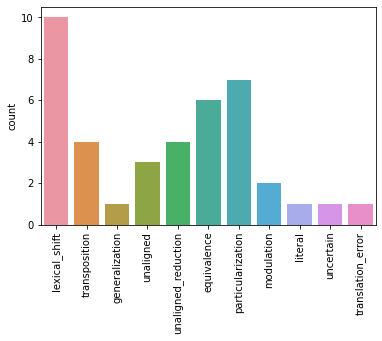

In [8]:
plt.xticks(rotation = 90) #
sns.countplot(pos_10_pos_15)

/fs/clip-xling/projects/semdiv/anaconda3/envs/semdiv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

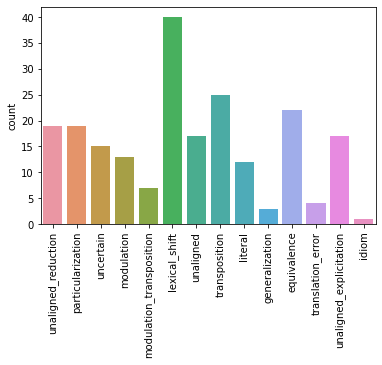

In [9]:
plt.xticks(rotation = 90) #
sns.countplot(neg_10_neg_5)

/fs/clip-xling/projects/semdiv/anaconda3/envs/semdiv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

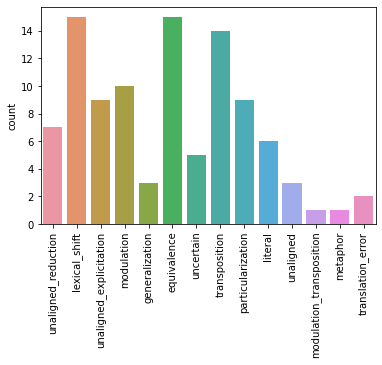

In [10]:
plt.xticks(rotation = 90) #
sns.countplot(neg_5_0)

/fs/clip-xling/projects/semdiv/anaconda3/envs/semdiv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

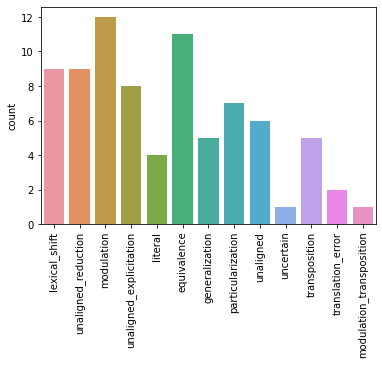

In [11]:
plt.xticks(rotation = 90) #
sns.countplot(pos_0_pos_5)

NameError: name 'negative_processes' is not defined

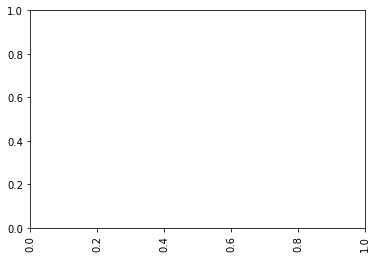

In [12]:
plt.xticks(rotation = 90) #
sns.countplot(negative_processes)

In [ ]:
for file_ in ['missing_paired_pos_phrases']:
    with open(f'outputs/{file_}', 'r') as out_:
        c = 0
        lines = out_.readlines()
        for threshold_gold in [0]:
            for id_, line in enumerate(lines):
                    continue
                    scores, score_color = [], []
                    c += 1
                
                    line = line.split('\t')
                    gold_a = np.array([float(x) for x in line[2].split(' ')])
                    gold_b = np.array([float(x) for x in line[3].split(' ')])
                    raw_a = np.array([float(x) for x in line[4].split(' ')])
                    raw_b = np.array([float(x) for x in line[5].split(' ')])
                    
                    
                    gold_a_ = np.where(gold_a > threshold_gold, 1, 0)
                    gold_b_ = np.where(gold_b > threshold_gold, 1, 0)
                    
                    
                    #if sum(raw_a) == len(raw_a)  or sum(raw_b) == len(raw_b):
                    #    continue
        
                    original_score = float(line[4])
                    revisions = int(line[5])
                    #all_revisions.append(revisions)
                    
                    previous_score = original_score
                    expl_a = [0] * len(gold_a)
                    expl_b = [0] * len(gold_b)
                    
                    scores.append(str(original_score))
                    score_color = '1'
                    
                    #if (sum(gold_a_) > (len(gold_a_)*0.5)) or (sum(gold_b_) > (len(gold_b_)*0.5)) :
                    #    continue
                        
                    #print(f'{len(gold_a_)} {sum(gold_a_)}' )
                    
                    for i in range(revisions):                        
                        score = line[5 + 3*i + 1]               
                        if float(score) - float(previous_score) < 0:
                            break
                        expl_a = add_lists(expl_a, [((i +1)*int(a)) for a in line[5 + 3*i + 2].split(' ')])
                        expl_b = add_lists(expl_b, [((i +1)*int(a)) for a in line[5 + 3*i + 3].split(' ')])
    
                        previous_score = score
                        scores.append(str(score))
                        score_color += f' {str(i+2)}'
                        
                    print(f'____________________________________{id_}___________________________________________________')


                    display_HTML(' '.join(scores), ' '.join(score_color.split(' ')))
                        
                    display_HTML(line[0], line[2], offset=False, one_color=True)
                    display_HTML(line[1], line[3], offset=False, one_color=True)
                        
                    print('-  -'*25)
                                                                         
                    display_HTML(line[0], ' '.join([str(x) for x in expl_a]), offset=True)
                    display_HTML(line[1], ' '.join([str(x) for x in expl_b]), offset=True) 
                    
                    #print('-'*100)

In [45]:
attention_ids = [342, 335, 6, 344, 332, 1, 351, 286, 354, 5, 338, 340, 118, 336, 353, 352, 2, 346, 347, 333, 9, 7, 11, 358, 345, 339]

In [6]:
import numpy as np

In [61]:
original_scores, final_scores =[], []

mqm=False
if mqm:
    annos=open('outputs/mqm_generalMT2022_annos', 'r').readlines()
    
#for file_ in ['ro-en-test21_inter_divergentmBERT']:
#for file_ in ['spa_Latn.devtest_missing_paired_phrases_reward']:
#for file_ in ['ell_Grek.devtest_missing_paired_phrases_reward']:
#for file_ in ['nd_missing_paired_pos_phrases_reward']:
#for file_ in ['fra_Latn.devtest_missing_paired_phrases_reward']:
#for file_ in ['natural_hallucinations_missing_paired_phrases_reward']:
#for file_ in ['mqm_generalMT2022_en_de_missing_paired_phrases_reward']:
for file_ in ['spa_Latn.devtest.equivalents.chatgpt.edits_missing_paired_phrases_reward']:

    with open(f'outputs/{file_}', 'r') as out_:
        c = 0
        lines = out_.readlines()
        for id_, line in enumerate(lines):
            scores, score_color = [], []
                
            line = line.split('\t')
            
            try:
                raw_a = np.array([float(x) for x in line[5].split(' ')])
                raw_b = np.array([float(x) for x in line[6].split(' ')])
            except IndexError:
                continue
                #print('Problem')
                    
        
            original_score = float(line[4])
            print(original_score)
            revisions = int(line[5])
            original_scores.append(original_score)        
            previous_score = original_score
            expl_a = [0] * len(line[0].split(' '))
            expl_b = [0] * len(line[1].split(' '))
                    
            scores.append(str(original_score))
            score_color = '1'
                    
         
                    
            for i in range(revisions):                        
                score = line[5 + 3*i + 1]               
                if float(previous_score) > 10:
                    break
                if float(score) - float(previous_score) < 1 or original_score > 10:
                    break
                expl_a = add_lists(expl_a, [((i +1)*int(a)) for a in line[5 + 3*i + 2].split(' ')])
                expl_b = add_lists(expl_b, [((i +1)*int(a)) for a in line[5 + 3*i + 3].split(' ')])
    
                previous_score = score
                scores.append(str(score))
                score_color += f' {str(i+2)}'
                
            final_scores.append(float(scores[-1]))
            diff = float(scores[-1]) - float(original_score) 
            #if diff < 15:
            #    continue
                        
            s_ = 0
            #print(f'{c}  ||| {line[0]}')
            #if c not in attention_ids:
            #    c+=1
            #    continue
            #if diff <=0:
            #    continue
            if original_score > 10:
                continue
            
            if mqm:
                error, sev = annos[id_].rstrip().split('\t')[0], annos[id_].rstrip().split('\t')[1]
                if error == 'No-error' or sev=='minor' or len(line[0].split(' ')) < 10:
                    continue
                
            print(f'____________________________________{id_}___________________________________________________')
            print(c)
            c+=1
            if mqm:
                print(annos[id_])

            #display_HTML(line[0], line[2], offset=False)#, one_color=True)
            #display_HTML(line[1], line[3], offset=False)#, one_color=True)

            print('-  -'*25)       
            display_HTML(' '.join(scores), ' '.join(score_color.split(' ')))            
            print(diff)

                                                                     
            display_HTML(line[0], ' '.join([str(x) for x in expl_a]), offset=True)
            display_HTML(line[1], ' '.join([str(x) for x in expl_b]), offset=True) 

11.652763
-7.9395885
____________________________________1___________________________________________________
0
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


19.8518065


8.629155
____________________________________2___________________________________________________
1
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


6.251074999999998


-8.100525
____________________________________3___________________________________________________
2
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


24.553767999999998


2.932028
____________________________________4___________________________________________________
3
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


8.45935


-10.773396
____________________________________5___________________________________________________
4
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


6.836297


11.941985
16.070333
12.020781
11.903284
14.534076
-2.1068373
____________________________________11___________________________________________________
5
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


12.3166873


14.2394705
13.894744
4.700405
____________________________________14___________________________________________________
6
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


6.346427


15.009882
15.383487
10.090794
-10.590907
____________________________________18___________________________________________________
7
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


7.3668499999999995


12.830269
12.390728
13.966455
-6.177346
____________________________________22___________________________________________________
8
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


18.311083


11.857092
-9.076277
____________________________________25___________________________________________________
9
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


22.664346000000002


15.911025
15.989369
15.548468
10.847313
16.476574
12.184871
11.925814
14.248803
-5.8910646
____________________________________34___________________________________________________
10
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


21.8047386


-10.152601
____________________________________37___________________________________________________
11
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


18.301988


9.156718
____________________________________38___________________________________________________
12
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


1.7802249999999997


10.1266365
12.524619
15.340255
13.2423115
16.15514
13.221954
10.696452
10.812893
12.855596
15.859259
-7.3055906
____________________________________49___________________________________________________
13
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


15.9830006


16.010149
-0.8949733
____________________________________51___________________________________________________
14
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


16.768156299999998


-5.7291923
____________________________________52___________________________________________________
15
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


17.5635143


16.326447
12.36257
2.7785163
____________________________________55___________________________________________________
16
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


10.7771467


16.38169
12.099432
16.47088
15.292059
-15.185013
____________________________________60___________________________________________________
17
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


25.256971


-16.127028
____________________________________61___________________________________________________
18
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


31.994174


12.352555
-9.558158
____________________________________64___________________________________________________
19
-  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  -


26.050933


13.18454
12.794354


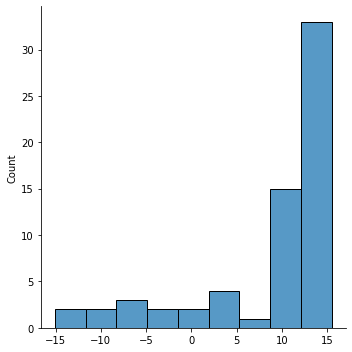

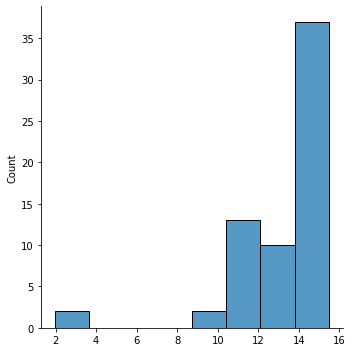

In [37]:
import seaborn as sns
sns.displot(original_scores)

sns.displot(final_scores)

In [ ]:
sns.scatterplot(original_scores, final_scores)

In [ ]:
sns.distplot(-np.array(original_scores)+np.array(final_scores))

In [ ]:
files_ = ['missing_paired_phrases_filtering_ngrams_2', 'missing_paired_phrases_filtering_ngrams_3', 'missing_paired_phrases_filtering_ngrams_4', 'missing_paired_phrases_filtering_ngrams_5', 'missing_paired_phrases_filtering_ngrams_6', 'missing_paired_phrases_filtering_ngrams_7', 'missing_paired_phrases_filtering_ngrams_8', 'missing_paired_phrases_filtering_ngrams_9', 'missing_paired_phrases_filtering_ngrams_10', 'missing_paired_phrases_filtering' , 'missing_paired_phrases_filtering_2_3' , 'missing_paired_phrases'] 

files_ = ['lime']
for file_ in files_:
    with open(f'outputs/{file_}', 'r') as out_:
        c = 0
        lines = out_.readlines()
        for threshold_gold in [0]:
            for id_, line in enumerate(lines):
                    scores, score_color = [], []
                    c += 1
                    #if c !=3:
                    #    continue
                    #if 120 > c or c > 130:
                   #     continue
                
                    line = line.split('\t')
                    #print(line)
                    gold_a = np.array([float(x) for x in line[2].split(' ')])
                    gold_b = np.array([float(x) for x in line[3].split(' ')])
                    raw_a = np.array([float(x) for x in line[-2].split(' ')])
                    raw_b = np.array([float(x) for x in line[-1].split(' ')])
                    
                    
                    gold_a_ = np.where(gold_a > threshold_gold, 1, 0)
                    gold_b_ = np.where(gold_b > threshold_gold, 1, 0)
                    
                    raw_a_ = np.where(raw_a < 0, 1, 0)
                    raw_b_ = np.where(raw_b < 0, 1, 0)
                    #print(raw_a_)
                    
                    #if sum(raw_a) == len(raw_a)  or sum(raw_b) == len(raw_b):
                    #    continue
        
                    #original_score = float(line[4])
                    #revisions = int(line[5])
                    #all_revisions.append(revisions)
            
                        
                    print(f'____________________________________{id_}___________________________________________________')
                    print(file_)



                    #display_HTML(' '.join(scores), ' '.join(score_color.split(' ')))
                        
                    display_HTML(line[0], line[2], offset=False, one_color=True)
                    display_HTML(line[1], line[3], offset=False, one_color=True)
                        
                    print('-  -'*25)
                        
                                                                     
                    display_HTML(line[0], ' '.join([str(x) for x in raw_a_]), offset=True)
                    display_HTML(line[1], ' '.join([str(x) for x in raw_b_]), offset=True) 
                    
                    #print('-'*100)

6
9
15
9
9
15
12
9
9
6
12
6
9
15
9
9
15
21
6
12
9
9
9
9
6
18
15
15
6
6
9
15
12
6
15
9
6
12
12
12
12
9
9
12
12
12
12
9
12
12
12
9
15
15
9
6
18
6
9
12
15
6
9
6
15
21
12


In [2]:
import random
random.seed(41)

o, g = [],[]
count = 0
dir_='en_de_ced'
dir_='refresd_nd'
dir_='flores_fr'
dir_='flores_gpt_paraphrase_es'

meta_id, meta_lbl, out_src, out_tgt = f'for_user_study/{dir_}/meta_id', f'for_user_study/{dir_}/meta_lbl', f'for_user_study/{dir_}/src', f'for_user_study/{dir_}/tgt'

original_scores, final_scores =[], []
#for file_ in ['ro-en-test21_inter_divergentmBERT']:
#for file_ in ['spa_Latn.devtest_missing_paired_phrases_reward']:
#for file_ in ['ell_Grek.devtest_missing_paired_phrases_reward']:
#for file_ in ['nd_missing_paired_pos_phrases_reward']:
#for file_ in ['nd_missing_paired_pos_phrases_reward']:


bad, explained =0, 0
no_highlights_ok = 0
halluci, no_halluci= 0, 0

lbls = open(f'outputs/test.2022.en-de.label', 'r').readlines()
lbls = open(f'outputs/natural_hallucinations_lbl', 'r').readlines()

original_count = 0
gpt_count = 0

#for file_ in ['en_de_ced_test_missing_paired_phrases_reward']:
#for file_ in ['en_pt_ced_test_missing_paired_phrases_reward']:
#for file_ in ['natural_hallucinations_missing_paired_phrases_reward']:
#for file_ in ['nd_missing_paired_pos_phrases_reward']:
#for file_ in ['fra_Latn.devtest_missing_paired_phrases_reward']:
for file_ in ['fra_Latn.devtest.equivalents.chatgpt.paraphrase_missing_paired_phrases_reward']:


    with open(f'outputs/{file_}', 'r') as out_:
        c = 0
        lines = out_.readlines()
        pop = len(lines)
        sample = random.sample(range(0, len(lines)), len(lines))
        #sample = random.sample(range(1, len(lines)), 100)
        print(sample)
        for id_, line in enumerate(lines):
            
            #if id_ not in sample:
            #    continue
            lbl =lbls[id_].rstrip()
            lbl = 'original'
            scores, score_color = [], []
                
            line = line.split('\t')
            
            try:
                raw_a = np.array([float(x) for x in line[5].split(' ')])
                raw_b = np.array([float(x) for x in line[6].split(' ')])
            except IndexError:
                continue
                #print('Problem')
                    
        
            original_score = float(line[4])
            revisions = int(line[5])
            original_scores.append(original_score)        
            previous_score = original_score
            expl_a = [0] * len(line[0].split(' '))
            expl_b = [0] * len(line[1].split(' '))
                    
            scores.append(str(original_score))
            score_color = '1'
                    
           
            for i in range(revisions):                        
                score = line[5 + 3*i + 1]               
                #if float(score) - float(previous_score) < 5:
                #if float(score) - float(previous_score) < 2 or original_score > 10:
                #    break
                if float(previous_score) > 10:
                    break
                if float(score) - float(previous_score) < 1 or original_score > 10:
                    break
                else:
                    lbl='chatGPT_paraphrase'
                    if i==0:
                        count+=1
                expl_a = add_lists(expl_a, [((i +1)*int(a)) for a in line[5 + 3*i + 2].split(' ')])
                expl_b = add_lists(expl_b, [((i +1)*int(a)) for a in line[5 + 3*i + 3].split(' ')])
    
                previous_score = score
                scores.append(str(score))
                score_color += f' {str(i+2)}'
                
            final_scores.append(float(scores[-1]))
            diff = float(scores[-1]) - float(original_score) 
            #if diff < 15:
            #    continue
                        
            s_ = 0
            if diff <=0: 
                if float(scores[0]) < 0:
                    expl_a =  [1]*len(line[0])
                    expl_b =  [1]*len(line[1])
                #continue
                
            en_num = [int(i) for i in line[0].split() if i.isdigit()]
            nen_num = [int(i) for i in line[1].split() if i.isdigit()]

            
            print(f'____________________________________{id_}___________________________________________________')
            
            if lbl == 'BAD' or lbl=='1': 
                if ([a.isupper() for a in line[0]].count(True))/len(line[0]) > 0.5 or '� � ' in line[0]:
                    halluci+=1
                #continue
                if set(en_num) != set(nen_num) and sum(expl_a)==0 and sum(expl_b)==0:
                    print('Numeric difference!!')
                    #print(en_num)
                    #print(nen_num)
                    explained+=1
                    #continue
                #print(nen_num)
                bad+=1
                if sum(expl_a) !=0:
                    explained+=1
                print(bcolors.FAIL + bcolors.BOLD + "😤 😠 😡 🤬  DETACHED HALLUCINATION" + bcolors.ENDC)
            else:
                if ([a.isupper() for a in line[0]].count(True))/len(line[0]) <= 0.5 or '� � ' not in line[0]:
                    no_halluci+=1

                if sum(expl_a) + sum(expl_b) ==0:
                    no_highlights_ok+=1
                #continue
                print(bcolors.OKBLUE + bcolors.BOLD + "🤓 OK" + bcolors.ENDC)
            
            #print(c)

            
            display_HTML(' '.join(scores), ' '.join(score_color.split(' ')))            
            print(diff)
            
            _, source_text = display_HTML(line[0], ' '.join([str(x) for x in expl_a]), offset=True)
            _, target_text = display_HTML(line[1], ' '.join([str(x) for x in expl_b]), offset=True) 
            
            
            if lbl == 'original':
                original_count +=1
            else:
                gpt_count += 1
            if original_count > 30 and lbl=='original':
                continue
                
            c+=1
            
            o.append(lbl)
            
            meta_id_file = open(f'{meta_id}_{c}.txt', 'w')
            meta_lbl_file = open(f'{meta_lbl}_{c}.txt', 'w')
            out_src_file = open(f'{out_src}_{c}.txt', 'w')
            out_tgt_file = open(f'{out_tgt}_{c}.txt', 'w')

            meta_id_file.write(f'{id_}')
            meta_lbl_file.write(f'{lbl}')
            out_src_file.write(f'{source_text}')
            out_tgt_file.write(f'{target_text}')

            meta_id_file.close()
            meta_lbl_file.close()
            out_src_file.close()
            out_tgt_file.close()
            

[48, 42, 29, 21, 57, 58, 24, 36, 62, 44, 18, 35, 17, 60, 46, 66, 59, 0, 15, 65, 1, 28, 9, 61, 20, 10, 16, 39, 37, 3, 7, 2, 27, 56, 13, 4, 23, 11, 30, 51, 31, 54, 63, 49, 38, 22, 26, 5, 52, 8, 41, 50, 43, 45, 14, 12, 55, 6, 32, 47, 53, 33, 25, 34, 19, 64, 40]
____________________________________0___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________1___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________2___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________3___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________4___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________5___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________6___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________7___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________8___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0


____________________________________9___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________10___________________________________________________
🤓 OK
1
2


12.7471244
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________11___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________12___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________13___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________14___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________15___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________16___________________________________________________
🤓 OK
1
2


3.3720676000000003
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0


____________________________________17___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________18___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________19___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________20___________________________________________________
🤓 OK
1
2


5.278584
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1


____________________________________21___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________22___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________23___________________________________________________
🤓 OK
1
2


7.9963836
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________24___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0


____________________________________25___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________26___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________27___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________28___________________________________________________
🤓 OK
1
2
3


20.697173
0
0
0
0
0
0
0
0
2
2
0
0
0
1
1
0


0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0


____________________________________29___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________30___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________31___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________32___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________33___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________34___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________35___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________36___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0


____________________________________37___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________38___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________39___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________40___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________41___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________42___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________43___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________44___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________45___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________46___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________47___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________48___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________49___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________50___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________51___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________52___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________53___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________54___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________55___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________56___________________________________________________
🤓 OK
1
2


3.8229450000000007
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________57___________________________________________________
🤓 OK
1
2
3


10.721516999999999
0
0
0
0
0
0
1
1
0
0
0
0
0
0
2
0
0
0


0
0
2
2
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0


____________________________________59___________________________________________________
🤓 OK
1
2


1.2528501
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0


____________________________________60___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________61___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________62___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________64___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


____________________________________65___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [14]:
import random
random.seed(41)

o, g = [],[]
count = 0
dir_='en_de_ced'
dir_='refresd_nd'
dir_='flores_fr'
dir_='flores_gpt_paraphrase_es'

meta_id, meta_lbl, out_src, out_tgt = f'for_user_study/{dir_}/meta_id', f'for_user_study/{dir_}/meta_lbl', f'for_user_study/{dir_}/src', f'for_user_study/{dir_}/tgt'

original_scores, final_scores =[], []


bad, explained =0, 0
no_highlights_ok = 0
halluci, no_halluci= 0, 0

lbls = open(f'outputs/test.2022.en-de.label', 'r').readlines()
lbls = open(f'outputs/natural_hallucinations_lbl', 'r').readlines()

original_count = 0
gpt_count = 0

file_2 = 'spa_Latn.devtest.equivalents.chatgpt.paraphrase_missing_paired_phrases_reward'
for file_ in ['spa_Latn.devtest.equivalents.chatgpt.edits_missing_paired_phrases_reward']:

    
    with open(f'outputs/{file_}', 'r') as out_, open(f'outputs/{file_2}', 'r') as out_2:
        c = 0
        lines = out_.readlines()
        lines2 = out_2.readlines()
        
        
        pop = len(lines)
        sample = random.sample(range(0, len(lines)), len(lines))
        #sample = random.sample(range(1, len(lines)), 100)
        print(sample)
        for id_, line in enumerate(lines):
            
            #if id_ not in sample:
            #    continue
            lbl =lbls[id_].rstrip()
            lbl = 'original'
            scores, score_color = [], []
                
            line = line.split('\t')
            line2 = lines2[id_].split('\t')
            print(line)
            
            try:
                raw_a = np.array([float(x) for x in line[5].split(' ')])
                raw_b = np.array([float(x) for x in line[6].split(' ')])
            except IndexError:
                continue
                #print('Problem')
                    
            
            original_score = float(line[4]) 
            original_score2 = float(line2[4])
            
            # Paraphrases
            if original_score > 10: 
                if line[0]!=line2[0]: 
                #if original_score!=original_score2:
                    print(f'paraphrased:{original_score2}')
                    line = line2
                    lbl = 'chatGPT_paraphrase'
                    original_score = original_score2
                

            revisions = int(line[5])
            original_scores.append(original_score)        
            previous_score = original_score
            expl_a = [0] * len(line[0].split(' '))
            expl_b = [0] * len(line[1].split(' '))
            
                    
            scores.append(str(original_score))
            score_color = '1'
                    
           
            for i in range(revisions):                        
                score = line[5 + 3*i + 1]               
                #if float(score) - float(previous_score) < 5:
                #if float(score) - float(previous_score) < 2 or original_score > 10:
                #    break
                if float(previous_score) > 10:
                    break
                if float(score) - float(previous_score) < 1 or original_score > 10:
                    break
                else:
                    if lbl!='chatGPT_paraphrase':
                        lbl = 'chatGPT_divergence'
                    if i==0:
                        count+=1
                expl_a = add_lists(expl_a, [((i +1)*int(a)) for a in line[5 + 3*i + 2].split(' ')])
                expl_b = add_lists(expl_b, [((i +1)*int(a)) for a in line[5 + 3*i + 3].split(' ')])
    
                previous_score = score
                scores.append(str(score))
                score_color += f' {str(i+2)}'
                
            final_scores.append(float(scores[-1]))
            diff = float(scores[-1]) - float(original_score) 
            #if diff < 15:
            #    continue
                        
            s_ = 0
            if diff <=0: 
                if float(scores[0]) < 0:
                    expl_a =  [1]*len(line[0])
                    expl_b =  [1]*len(line[1])
                #continue
                
            en_num = [int(i) for i in line[0].split() if i.isdigit()]
            nen_num = [int(i) for i in line[1].split() if i.isdigit()]

            
            print(f'____________________________________{id_}___________________________________________________')
            
            if lbl == 'BAD' or lbl=='1': 
                if ([a.isupper() for a in line[0]].count(True))/len(line[0]) > 0.5 or '� � ' in line[0]:
                    halluci+=1
                #continue
                if set(en_num) != set(nen_num) and sum(expl_a)==0 and sum(expl_b)==0:
                    print('Numeric difference!!')
                    #print(en_num)
                    #print(nen_num)
                    explained+=1
                    #continue
                #print(nen_num)
                bad+=1
                if sum(expl_a) !=0:
                    explained+=1
                print(bcolors.FAIL + bcolors.BOLD + "😤 😠 😡 🤬  DETACHED HALLUCINATION" + bcolors.ENDC)
            else:
                if ([a.isupper() for a in line[0]].count(True))/len(line[0]) <= 0.5 or '� � ' not in line[0]:
                    no_halluci+=1

                if sum(expl_a) + sum(expl_b) ==0:
                    no_highlights_ok+=1
                #continue
                print(bcolors.OKBLUE + bcolors.BOLD + "🤓 OK" + bcolors.ENDC)
            
            #print(c)

            
            display_HTML(' '.join(scores), ' '.join(score_color.split(' ')))            
            print(diff)
            
            _, source_text = display_HTML(line[0], ' '.join([str(x) for x in expl_a]), offset=True)
            _, target_text = display_HTML(line[1], ' '.join([str(x) for x in expl_b]), offset=True) 
            
            
            if lbl == 'original':
                original_count +=1
            else:
                gpt_count += 1
            if original_count > 21 and lbl=='original':
                continue
                
            c+=1
            
            o.append(lbl)
            
            meta_id_file = open(f'{meta_id}_{c}.txt', 'w')
            meta_lbl_file = open(f'{meta_lbl}_{c}.txt', 'w')
            out_src_file = open(f'{out_src}_{c}.txt', 'w')
            out_tgt_file = open(f'{out_tgt}_{c}.txt', 'w')

            meta_id_file.write(f'{id_}')
            meta_lbl_file.write(f'{lbl}')
            out_src_file.write(f'{source_text}')
            out_tgt_file.write(f'{target_text}')

            meta_id_file.close()
            meta_lbl_file.close()
            out_src_file.close()
            out_tgt_file.close()
            

[48, 42, 29, 21, 57, 58, 24, 36, 62, 44, 18, 35, 17, 60, 46, 66, 59, 0, 15, 65, 1, 28, 9, 61, 20, 10, 16, 39, 37, 3, 7, 2, 27, 56, 13, 4, 23, 11, 30, 51, 31, 54, 63, 49, 38, 22, 26, 5, 52, 8, 41, 50, 43, 45, 14, 12, 55, 6, 32, 47, 53, 33, 25, 34, 19, 64, 40]
['Apia is the capital of Samoa. The town is on the island of Upolu and has a population of just under 40,000.', 'Capital de Samoa, la ciudad de Apia se ubica en la isla de Upolu y cuenta con poco menos de 40 000 habitantes.', 'Apia is the capital of Samoa. The town is on the island of Upolu and has a population of just under 40,000.', 'Capital de Samoa, la ciudad de Apia se ubica en la isla de Upolu y cuenta con poco menos de 40 000 habitantes.', '11.652763', '2', '13.945961', '1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '15.89358', '0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________0________________

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['People may not anticipate that patience and understanding are also necessary for the process of readjustment when travelers return home.', 'La gente puede no prever que la tolerancia y la comprensión también son necesarias para los viajeros de regreso en sus hogares.', 'People may not anticipate that patience and understanding are also necessary for the process of readjustment when travelers return home.', 'La gente puede no prever que la tolerancia y la comprensión también son necesarias para los viajeros de regreso en sus hogares.', '-7.9395885', '3', '11.912218', '0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '13.377552', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0', '15.017166', '1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________1___________________________________________________
🤓 OK
1
2


19.8518065
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['He is skeptical about whether diabetes can be cured, noting that these findings have no relevance to people who already have Type 1 diabetes.', 'Al igual que otros especialistas, es escéptico acerca de si la diabetes tiene cura y remarca que estos descubrimientos no son relevantes para quienes que ya padecen de diabetes de tipo 1.', 'He is skeptical about whether diabetes can be cured, noting that these findings have no relevance to people who already have Type 1 diabetes.', 'Al igual que otros especialistas, es escéptico acerca de si la diabetes tiene cura y remarca que estos descubrimientos no son relevantes para quienes que ya padecen de diabetes de tipo 1.', '8.629155', '2', '14.88023', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '15.230633', '0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________2__________

6.251074999999998
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


["Ancient Roman meals couldn't have included foods that came to Europe from America or Asia after their time.", 'No es posible que las recetas de la antigua Roma incluyeran alimentos que llegaron a Europa desde América o Asia siglos después.', "Ancient Roman meals couldn't have included foods that came to Europe from America or Asia after their time.", 'No es posible que las recetas de la antigua Roma incluyeran alimentos que llegaron a Europa desde América o Asia siglos después.', '-8.100525', '2', '9.715794', '0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1', '16.453243', '0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________3___________________________________________________
🤓 OK
1
2
3


24.553767999999998
0
0
0
2
2
0
0
0
0
0
0
0
0
1
1
1
1
1


2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1


['Danius said, "Right now we are not taking any action. I have contacted individuals who work closely with him, and I have received encouraging responses. At this point, we believe that is sufficient."', 'Danius declaró: «Actualmente no estamos haciendo nada. Llamé y envié correos electrónicos a su asistente más cercano y recibí contestaciones muy cordiales. Por el momento, eso es sin dudas suficiente».', 'Danius said, "Right now we are not taking any action. I have contacted individuals who work closely with him, and I have received encouraging responses. At this point, we believe that is sufficient."', 'Danius declaró: «Actualmente no estamos haciendo nada. Llamé y envié correos electrónicos a su asistente más cercano y recibí contestaciones muy cordiales. Por el momento, eso es sin dudas suficiente».', '2.932028', '3', '9.011218', '0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '11.391378', '0 0 0 0 

8.45935
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
2
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
0
0
0
0
0
0
2
0
0
0
0
0


["According to Ring's CEO Jamie Siminoff, the idea for the company came about when he missed a delivery because he couldn't hear the doorbell from his garage workshop, which was located a significant distance away from his front door.", 'Con anterioridad, el director ejecutivo de Ring, Jamie Siminoff, mencionó que la compañía había iniciado a raíz de que el timbre de su entrada no podía oírse desde la tienda que tenía montada en su garaje.', "According to Ring's CEO Jamie Siminoff, the idea for the company came about when he missed a delivery because he couldn't hear the doorbell from his garage workshop, which was located a significant distance away from his front door.", 'Con anterioridad, el director ejecutivo de Ring, Jamie Siminoff, mencionó que la compañía había iniciado a raíz de que el timbre de su entrada no podía oírse desde la tienda que tenía montada en su garaje.', '-10.773396', '2', '-3.937099', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 

6.836297
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['North Shore beaches (in North Harbour district) are on the Pacific Ocean and stretch from Long Bay in the north to Devonport in the south.', 'En el distrito de North Harbour, en el Océano Pacífico, se encuentran las playas de North Shore, que despliegan desde Long Bay, en el norte, hasta Devonport, en el sur.', 'North Shore beaches (in North Harbour district) are on the Pacific Ocean and stretch from Long Bay in the north to Devonport in the south.', 'En el distrito de North Harbour, en el Océano Pacífico, se encuentran las playas de North Shore, que despliegan desde Long Bay, en el norte, hasta Devonport, en el sur.', '11.941985', '2', '14.474958', '0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0', '16.257595', '0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________6___________________________________________________
🤓 OK

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The pyramid sound and light show is one of the most interesting things in the area for kids.', 'El espectáculo de luces y el sonido piramidal son una de las cosas más interesantes para los niños en la zona.', 'The pyramid sound and light show is one of the most interesting things in the area for kids.', 'El espectáculo de luces y el sonido piramidal son una de las cosas más interesantes para los niños en la zona.', '16.070333', '1', '16.454094', '0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________7___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['In late 2017, Siminoff appeared on shopping television channel QVC.', 'Hacia fines del año 2017, Siminoff hizo una aparición en el canal de compras televisadas QVC.', 'In late 2017, Siminoff appeared on shopping television channel QVC.', 'Hacia fines del año 2017, Siminoff hizo una aparición en el canal de compras televisadas QVC.', '12.020781', '1', '13.308284', '0 1 0 0 0 0 0 0 0 0', '0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________8___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['You can see the pyramids in the dark and you can see them in silence before the show begins.', 'En la oscuridad, se pueden ver las pirámides y contemplarlas en silencio antes de que empiece el espectáculo.', 'You can see the pyramids in the dark and you can see them in silence before the show begins.', 'En la oscuridad, se pueden ver las pirámides y contemplarlas en silencio antes de que empiece el espectáculo.', '11.903284', '1', '15.923152', '0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0\n']
____________________________________9___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['There may be more maria on the near side because the crust is thinner. It was easier for lava to rise up to the surface.', 'Es posible que haya más mares en el lado cercano debido a que su corteza es más delgada, lo que facilitó a la lava ascender a la superficie.', 'There may be more maria on the near side because the crust is thinner. It was easier for lava to rise up to the surface.', 'Es posible que haya más mares en el lado cercano debido a que su corteza es más delgada, lo que facilitó a la lava ascender a la superficie.', '14.534076', '2', '16.21043', '0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.249474', '0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
paraphrased:2.7169836
____________________________________10___________________________________________________
🤓 OK
1
2


6.8994463999999995
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['There were no large forests in the land of Canaan, so the cost of obtaining timber was exorbitant.', 'En la tierra de Canaán no había bosques grandes; por ello, la madera era extremadamente costosa.', 'There were no large forests in the land of Canaan, so the cost of obtaining timber was exorbitant.', 'En la tierra de Canaán no había bosques grandes; por ello, la madera era extremadamente costosa.', '-2.1068373', '2', '10.20985', '0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '12.121285', '0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0\n']
____________________________________11___________________________________________________
🤓 OK
1
2


12.3166873
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


["Though each country was 'Scandinavian', there were many differences between the people, kings, customs and history of Denmark, Sweden, Norway and Iceland.", 'Si bien cada país por separado era «escandinavo», existían marcadas diferencias en relación al pueblo, los monarcas, los hábitos y la historia entre Dinamarca, Suecia, Noruega e Islandia.', "Though each country was 'Scandinavian', there were many differences between the people, kings, customs and history of Denmark, Sweden, Norway and Iceland.", 'Si bien cada país por separado era «escandinavo», existían marcadas diferencias en relación al pueblo, los monarcas, los hábitos y la historia entre Dinamarca, Suecia, Noruega e Islandia.', '14.2394705', '3', '16.434599', '0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.456415', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.475584', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Written on the back of the Declaration of Independence were the words "Original Declaration of Independence dated 4th July 1776". The text appears on the bottom of the document, upside down.', 'La Declaración de la Independencia tiene escrito en su reverso la frase «Declaración de Independencia original del 4 de julio de 1776». El texto figura en la parte inferior del documento, boca abajo.', 'Written on the back of the Declaration of Independence were the words "Original Declaration of Independence dated 4th July 1776". The text appears on the bottom of the document, upside down.', 'La Declaración de la Independencia tiene escrito en su reverso la frase «Declaración de Independencia original del 4 de julio de 1776». El texto figura en la parte inferior del documento, boca abajo.', '13.894744', '2', '16.185524', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.329466', '0 0 0 0 0 0 0 0 0 0 0 0 0 

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The movie, featuring Gosling and Stone, received nominations in all major categories.', 'El filme, protagonizado por Tyan Gosling y Emma Stone, fue nominado en todas las categorías más importantes.', 'The movie, featuring Gosling and Stone, received nominations in all major categories.', 'El filme, protagonizado por Tyan Gosling y Emma Stone, fue nominado en todas las categorías más importantes.', '4.700405', '2', '11.046832', '0 0 1 0 0 0 0 0 0 0 0 0', '0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0', '12.404312', '0 0 0 0 1 0 0 0 0 0 0 0', '0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0\n']
____________________________________14___________________________________________________
🤓 OK
1
2


6.346427
0
0
1
0
0
0
0
0
0
0
0
0


0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0


['All things considered, we should not be surprised if our own ancestors solved their "protein problem" in somewhat the same way that chimps on the savanna do today.', 'En definitiva, no debería causarnos sorpresa si nuestros propios predecesores resolvían sus «problemas proteicos» del mismo modo que los chimpancés de la sabana en la actualidad.', 'All things considered, we should not be surprised if our own ancestors solved their "protein problem" in somewhat the same way that chimps on the savanna do today.', 'En definitiva, no debería causarnos sorpresa si nuestros propios predecesores resolvían sus «problemas proteicos» del mismo modo que los chimpancés de la sabana en la actualidad.', '15.009882', '3', '16.34134', '0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.478565', '0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.489489', '0 0 0 0 0 0 0 0 

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Deputy Inspector General D K Arya said, "We have arrested five persons who raped the Swiss woman and recovered her mobile and laptop".', 'El inspector general adjunto, D.K. Arya, declaró: «Hemos puesto bajo arresto a cinco individuos que abusaron de la mujer suiza y recuperamos su teléfono móvil y su computadora portátil».', 'Deputy Inspector General D K Arya said, "We have arrested five persons who raped the Swiss woman and recovered her mobile and laptop".', 'El inspector general adjunto, D.K. Arya, declaró: «Hemos puesto bajo arresto a cinco individuos que abusaron de la mujer suiza y recuperamos su teléfono móvil y su computadora portátil».', '15.383487', '3', '16.464054', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0', '16.468414', '0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.474686', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 

3.741307700000001
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0


0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Spokesman for Medecines Sans Frontiere Richard Veerman said: "Angola is heading for its worst ever outbreak and the situation remains very bad in Angola," he said.', 'El portavoz de Medecines Sans Frontiere, Richard Veerman, comentó: «Angola se dirige hacia el brote más severo que jamás haya enfrentado y su situación continúa siendo muy grave».', 'Spokesman for Medecines Sans Frontiere Richard Veerman said: "Angola is heading for its worst ever outbreak and the situation remains very bad in Angola," he said.', 'El portavoz de Medecines Sans Frontiere, Richard Veerman, comentó: «Angola se dirige hacia el brote más severo que jamás haya enfrentado y su situación continúa siendo muy grave».', '10.090794', '3', '16.028368', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.366655', '0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.372746', '0 0 0 0 0 0 0

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The United States President, Donald Trump, announced the withdrawal of US troops from Syria on Sunday, via an official statement.', 'El domingo por la noche, en un anuncio realizado mediante el secretario de prensa, el presidente de los Estados Unidos de América, Donald Trump, comunicó que las tropas estadounidenses se retirarían de Siria.', 'The United States President, Donald Trump, announced the withdrawal of US troops from Syria on Sunday, via an official statement.', 'El domingo por la noche, en un anuncio realizado mediante el secretario de prensa, el presidente de los Estados Unidos de América, Donald Trump, comunicó que las tropas estadounidenses se retirarían de Siria.', '-10.590907', '1', '-3.224057', '1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0\n']
____________________________________18___________________________________________________
🤓 OK
1
2


7.3668499999999995
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0


['The Tibetan Buddhism is based on the teachings of Buddha, but were extended by the mahayana path of love and by a lot of techniques from Indian Yoga.', 'Si bien las bases del budismo tibetano son las enseñanzas de Buda, se extendieron por el sendero del amor Mahayana y numerosas técnicas del yoga de la India.', 'The Tibetan Buddhism is based on the teachings of Buddha, but were extended by the mahayana path of love and by a lot of techniques from Indian Yoga.', 'Si bien las bases del budismo tibetano son las enseñanzas de Buda, se extendieron por el sendero del amor Mahayana y numerosas técnicas del yoga de la India.', '12.830269', '3', '16.057644', '0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.420254', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.479513', '0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 1 1 0 

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Angel (2006), explains the Continuum approach as a method being used to help organizations reach a higher level of performance.', 'Angel (2006) explica el enfoque continuo como un método utilizado para ayudar a las organizaciones a lograr un mayor nivel de desempeño.', 'Angel (2006), explains the Continuum approach as a method being used to help organizations reach a higher level of performance.', 'Angel (2006) explica el enfoque continuo como un método utilizado para ayudar a las organizaciones a lograr un mayor nivel de desempeño.', '12.390728', '3', '14.531459', '1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '15.676448', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0', '16.316046', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1\n']
paraphrased:0.37373903
____________________________________20___________________________________________________
🤓 OK
1
2
3


7.19407247
0
2
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0


0
0
0
0
0
2
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0


["Anyone who's going to drive at high latitudes or over mountain passes should consider the possibility of snow, ice, or freezing temperatures.", 'Cualquier persona que se proponga conducir en latitudes altas o en pasos de montañas debe prever la posibilidad de que haya nieve, hielo o bajas temperaturas.', "Anyone who's going to drive at high latitudes or over mountain passes should consider the possibility of snow, ice, or freezing temperatures.", 'Cualquier persona que se proponga conducir en latitudes altas o en pasos de montañas debe prever la posibilidad de que haya nieve, hielo o bajas temperaturas.', '13.966455', '3', '15.0495615', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0', '15.327841', '0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0', '15.47467', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0\n']
____________________

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['During winter weather conditions, visibility may be severely restricted by heavy snowfall or blizzards, as well as by the accumulation of ice or condensation on vehicle windows.', 'Además, la visibilidad puede reducirse por nevadas o por la condensación o el hielo que se forma en las ventanas del automóvil.', 'During winter weather conditions, visibility may be severely restricted by heavy snowfall or blizzards, as well as by the accumulation of ice or condensation on vehicle windows.', 'Además, la visibilidad puede reducirse por nevadas o por la condensación o el hielo que se forma en las ventanas del automóvil.', '-6.177346', '2', '12.133737', '1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '14.323622', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________22___________________________________________________
🤓 OK
1
2


18.311083
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The speeds of 802.11n are substantially faster than that of its predecessors with a maximum theoretical throughput of 600Mbit/s.', 'Las velocidades del estándar 802.11n son mucho más altas que las alcanzadas por los que lo precedieron, con un rendimiento teórico máximo de 600 Mbps.', 'The speeds of 802.11n are substantially faster than that of its predecessors with a maximum theoretical throughput of 600Mbit/s.', 'Las velocidades del estándar 802.11n son mucho más altas que las alcanzadas por los que lo precedieron, con un rendimiento teórico máximo de 600 Mbps.', '11.857092', '2', '13.271098', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '15.188572', '0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
paraphrased:-7.4608154
____________________________________23___________________________________________________
🤓 OK
1
2


4.3830540000000004
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0


['In late 2015, TogiNet established AstroNet Radio as a subsidiary station.', 'A fines de 2015, TogiNet instaló la estación AstroNet Radio como una filial.', 'In late 2015, TogiNet established AstroNet Radio as a subsidiary station.', 'A fines de 2015, TogiNet instaló la estación AstroNet Radio como una filial.', '13.076325', '0\n']
['İzmir is the third largest city in Turkey with a population of around 3.7 million, the second biggest port after Istanbul, and a very good transport hub due to its strategic location.', 'Esmirna es la tercera ciudad más importante de Turquía, con aproximadamente 3.7 millones de habitantes, el segundo puerto más grande luego de Estambul y una muy buena central de transporte.', 'İzmir is the third largest city in Turkey with a population of around 3.7 million, the second biggest port after Istanbul, and a very good transport hub due to its strategic location.', 'Esmirna es la tercera ciudad más importante de Turquía, con aproximadamente 3.7 millones de habi

22.664346000000002
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1


['Hu encouraged developing countries "to avoid the old path of polluting first and cleaning up later."', 'Hu incentivó a los estados en vías de desarrollo a «no volver al tradicional camino de contaminar primero y hacer limpieza después».', 'Hu encouraged developing countries "to avoid the old path of polluting first and cleaning up later."', 'Hu incentivó a los estados en vías de desarrollo a «no volver al tradicional camino de contaminar primero y hacer limpieza después».', '15.911025', '2', '16.413961', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.481424', '0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0\n']
____________________________________26___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['South Africa have defeated the All Blacks (New Zealand) in a rugby union Tri Nations match at the Royal Bafokeng Stadium in Rustenburg, South Africa.', 'Sudáfrica venció a los All Blacks, de Nueva Zelanda, en un partido de rugby de las Tres Naciones, en el estadio Royal Bafokeng, en Rustenburg, Sudáfrica.', 'South Africa have defeated the All Blacks (New Zealand) in a rugby union Tri Nations match at the Royal Bafokeng Stadium in Rustenburg, South Africa.', 'Sudáfrica venció a los All Blacks, de Nueva Zelanda, en un partido de rugby de las Tres Naciones, en el estadio Royal Bafokeng, en Rustenburg, Sudáfrica.', '15.989369', '5', '16.009655', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0', '16.208353', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0', '16.459402', '1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0'

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The ministry responded by calling Apple\'s postponement of the report "truly regrettable."', 'El ministerio se pronunció en relación al retraso en el informe de Apple, diciendo que era algo «verdaderamente lamentable».', 'The ministry responded by calling Apple\'s postponement of the report "truly regrettable."', 'El ministerio se pronunció en relación al retraso en el informe de Apple, diciendo que era algo «verdaderamente lamentable».', '15.548468', '3', '16.421505', '0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0', '16.464338', '0 0 0 0 1 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0', '16.4753', '0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0\n']
paraphrased:-8.275118
____________________________________28___________________________________________________
🤓 OK
1
2


11.250132
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0


0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0


['Scotturb Bus 403 travels regularly to Sintra, stopping at Cabo da Roca.', 'En Scotturb, el autobús 403 se dirige con regularidad a Sintra y para en Cabo da Roca.', 'Scotturb Bus 403 travels regularly to Sintra, stopping at Cabo da Roca.', 'En Scotturb, el autobús 403 se dirige con regularidad a Sintra y para en Cabo da Roca.', '10.847313', '1', '14.978348', '0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0\n']
____________________________________29___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The earthquake was centered about 20 km (15 miles) north-northeast of Dillon, and about 65 km (40 miles) south of Butte.', 'El epicentro del sismo se localizó cerca de 20 km (15 mi) al nornoreste de Dillon y a casi 65 km (40 mi) al sur de Butte.', 'The earthquake was centered about 20 km (15 miles) north-northeast of Dillon, and about 65 km (40 miles) south of Butte.', 'El epicentro del sismo se localizó cerca de 20 km (15 mi) al nornoreste de Dillon y a casi 65 km (40 mi) al sur de Butte.', '16.476574', '6', '16.476887', '0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0', '16.479689', '0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.48704', '0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.490877', '0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.492685', '0 0 0 0 0 

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The debate was sparked by controversy over spending on relief and reconstruction in the wake Hurricane Katrina; which some fiscal conservatives have humorously labeled "Bush\'s New Orleans Deal."', 'La cuestión que dio origen al debate fue la controversia en torno al presupuesto destinado al socorro y reconstrucción posteriores al huracán Katrina, medida que algunos conservadores fiscales etiquetaron en torno de broma como el «Acuerdo de Nueva Orleans de Bush».', 'The debate was sparked by controversy over spending on relief and reconstruction in the wake Hurricane Katrina; which some fiscal conservatives have humorously labeled "Bush\'s New Orleans Deal."', 'La cuestión que dio origen al debate fue la controversia en torno al presupuesto destinado al socorro y reconstrucción posteriores al huracán Katrina, medida que algunos conservadores fiscales etiquetaron en torno de broma como el «Acuerdo de Nueva Orleans de Bush».', '12.184871', '2', '15.842158', '0 0 0 0 0 0 0 0 1 1 0 0 0 0 0

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Chambers had sued God for "widespread death, destruction and terrorization of millions upon millions of the Earth\'s inhabitants."', 'El reclamo de Chambers contra Dios se fundaba en «la muerte por doquier, destrucción y terror de millones y millones de personas en el planeta».', 'Chambers had sued God for "widespread death, destruction and terrorization of millions upon millions of the Earth\'s inhabitants."', 'El reclamo de Chambers contra Dios se fundaba en «la muerte por doquier, destrucción y terror de millones y millones de personas en el planeta».', '11.925814', '4', '15.676638', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0', '16.239094', '0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.251541', '0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.379826', '0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


["He trained as an obstetrician and began to work at the Auckland's National Women's Hospital in 1959.", 'Recibió formación en obstetricia e ingresó a trabajar para el Hospital Nacional de Mujeres de Auckland hacia 1959.', "He trained as an obstetrician and began to work at the Auckland's National Women's Hospital in 1959.", 'Recibió formación en obstetricia e ingresó a trabajar para el Hospital Nacional de Mujeres de Auckland hacia 1959.', '14.248803', '3', '16.3307', '0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0', '16.375154', '0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.439938', '0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0\n']
____________________________________33___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The story presented in the French opera by Camille Saint-Saens is of an artist whose life is dictated by a love for Japan.', 'La historia que narra la ópera francesa presentada por Camille Saint-Saens es la de un artista «cuya vida está prescrita por el amor, por las drogas y por Japón».', 'The story presented in the French opera by Camille Saint-Saens is of an artist whose life is dictated by a love for Japan.', 'La historia que narra la ópera francesa presentada por Camille Saint-Saens es la de un artista «cuya vida está prescrita por el amor, por las drogas y por Japón».', '-5.8910646', '2', '15.913674', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0', '16.224396', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0\n']
____________________________________34___________________________________________________
🤓 OK
1
2


21.8047386
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
0
0
0


['In the north the region is bounded by the Sahel, and in the south and west by the Atlantic Ocean.', 'La región limita con el Sahel al norte, y con el Océano Atlántico al sur y al oeste.', 'In the north the region is bounded by the Sahel, and in the south and west by the Atlantic Ocean.', 'La región limita con el Sahel al norte, y con el Océano Atlántico al sur y al oeste.', '16.194054', '0\n']
['Parisians have a reputation for being egocentric, rude and arrogant.', 'Los parisinos tienen reputación de egocéntricos, descorteses y engreídos.', 'Parisians have a reputation for being egocentric, rude and arrogant.', 'Los parisinos tienen reputación de egocéntricos, descorteses y engreídos.', '11.862208', '0\n']
['Robin Uthappa, with a stunning display of batting, made the innings highest score of 70 runs in just 41 balls by hitting 11 fours and 2 sixes.', 'Robin Uthappa obtuvo la mayor puntuación en entradas: 70 anotaciones con solo 41 bolas, al conectar 11 cuatros y 2 seises.', 'Robin Ut

18.301988
1
1
1
1
1
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


["Caretaker Prime Minister Julia Gillard claimed during the campaign of the 2010 state election that she believed Australia should become a republic at the end of Queen Elizabeth II's reign.", 'Julia Gillard, primera ministra interina, sostuvo, durante la campaña de las elecciones federales de 2010, que consideraba que Australia debería pasar a ser una república una vez finalizado el mandato de la reina Isabel II.', "Caretaker Prime Minister Julia Gillard claimed during the campaign of the 2010 state election that she believed Australia should become a republic at the end of Queen Elizabeth II's reign.", 'Julia Gillard, primera ministra interina, sostuvo, durante la campaña de las elecciones federales de 2010, que consideraba que Australia debería pasar a ser una república una vez finalizado el mandato de la reina Isabel II.', '9.156718', '2', '10.936943', '0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

1.7802249999999997
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['In inland regions of Northern India and Pakistan, yogurt is commonly used in curries; in Southern India and some other coastal regions of the subcontinent, coconut milk is commonly used.', 'En los pueblos del interior del norte de la India y Pakistán, se suele usar el yogur en el curry. En el sur de la India y en otros sectores costeros del subcontinente, es habitual consumir leche de coco.', 'In inland regions of Northern India and Pakistan, yogurt is commonly used in curries; in Southern India and some other coastal regions of the subcontinent, coconut milk is commonly used.', 'En los pueblos del interior del norte de la India y Pakistán, se suele usar el yogur en el curry. En el sur de la India y en otros sectores costeros del subcontinente, es habitual consumir leche de coco.', '10.1266365', '3', '15.674556', '0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '15.862995', '0 0 0 0 0 0 0 0

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Nothing can be seen other than the clear, beautiful sky above and the many surrounding mountains. Very little of this world can be seen or heard from inside the cave.', 'Nada puede verse más que el maravilloso cielo despejado y las numerosas montañas de los alrededores. Desde el interior de esta cueva, se puede ver u oír muy poco de este mundo.', 'Nothing can be seen other than the clear, beautiful sky above and the many surrounding mountains. Very little of this world can be seen or heard from inside the cave.', 'Nada puede verse más que el maravilloso cielo despejado y las numerosas montañas de los alrededores. Desde el interior de esta cueva, se puede ver u oír muy poco de este mundo.', '12.524619', '1', '14.325547', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________40___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Bush spokesman Gordon Johndroe called North Korea\'s pledge "a major step towards the goal of achieving the verifiable denuclearization of the Korean peninsula."', 'Gordon Johndroe, vocero de Bush, se refirió al compromiso norcoreano como «un avance importante hacia el objetivo de alcanzar la desnuclearización constatable de la península de Corea».', 'Bush spokesman Gordon Johndroe called North Korea\'s pledge "a major step towards the goal of achieving the verifiable denuclearization of the Korean peninsula."', 'Gordon Johndroe, vocero de Bush, se refirió al compromiso norcoreano como «un avance importante hacia el objetivo de alcanzar la desnuclearización constatable de la península de Corea».', '15.340255', '2', '16.480822', '0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.482138', '0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
_________________________________

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['In 1990, it was added to the list of world heritage sites in danger, due to the threat of desert sands.', 'En 1990, fue incorporado al listado de lugares del patrimonio de la humanidad en riesgo, producto de la amenaza de las arenas del desierto.', 'In 1990, it was added to the list of world heritage sites in danger, due to the threat of desert sands.', 'En 1990, fue incorporado al listado de lugares del patrimonio de la humanidad en riesgo, producto de la amenaza de las arenas del desierto.', '13.2423115', '3', '14.353518', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0', '16.4154', '0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0', '16.47721', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0\n']
____________________________________42___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Downhill snowsports, which include skiing and snowboarding, are popular sports involving sliding down snow-covered terrain with skis or a snowboard attached to your feet.', 'Los deportes de nieve en descenso, como el esquí y la tablanieve, son disciplinas populares que consisten en deslizarse con esquís o una tabla fijada a los pies, sobre un terreno nevado.', 'Downhill snowsports, which include skiing and snowboarding, are popular sports involving sliding down snow-covered terrain with skis or a snowboard attached to your feet.', 'Los deportes de nieve en descenso, como el esquí y la tablanieve, son disciplinas populares que consisten en deslizarse con esquís o una tabla fijada a los pies, sobre un terreno nevado.', '16.15514', '3', '16.195557', '0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0', '16.201332', '0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


["Fears of lack of transportation raised the possibility that the game would be forced to play behind closed doors without the team's supporters.", 'Debido a la preocupación generada por la posible falta de transporte, se consideró la posibilidad de que el juego se realizara a puertas cerradas, sin los fanáticos del equipo.', "Fears of lack of transportation raised the possibility that the game would be forced to play behind closed doors without the team's supporters.", 'Debido a la preocupación generada por la posible falta de transporte, se consideró la posibilidad de que el juego se realizara a puertas cerradas, sin los fanáticos del equipo.', '13.221954', '4', '16.325203', '0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.429983', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.468618', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 1 1 1 1 0 

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Skiing is a major travelling activity with many enthusiasts, occasionally known as "ski bums," planning entire vacations around skiing at a particular location.', 'Esquiar es una actividad principal de viaje con muchos adeptos, en ocasiones llamados «amantes del esquí», que organizan sus vacaciones completamente en base al esquí en un sitio específico.', 'Skiing is a major travelling activity with many enthusiasts, occasionally known as "ski bums," planning entire vacations around skiing at a particular location.', 'Esquiar es una actividad principal de viaje con muchos adeptos, en ocasiones llamados «amantes del esquí», que organizan sus vacaciones completamente en base al esquí en un sitio específico.', '10.696452', '3', '12.414152', '0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '12.740511', '0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '14.338952', '0 0 0

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['It is one of the main attractions of South Africa and it is considered the flagship of South African National Parks (SANParks).', 'Esta es una de las atracciones más importantes de Sudáfrica y se la reconoce como ícono principal de los Parques Nacionales de Sudáfrica (SANParks).', 'It is one of the main attractions of South Africa and it is considered the flagship of South African National Parks (SANParks).', 'Esta es una de las atracciones más importantes de Sudáfrica y se la reconoce como ícono principal de los Parques Nacionales de Sudáfrica (SANParks).', '10.812893', '3', '15.497182', '0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0', '16.419195', '0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.48756', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0\n']
____________________________________46___________________________________________

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Pronunciation is relatively easy in Italian since most words are pronounced exactly how they are written', 'Pronunciar el italiano es relativamente sencillo, dado que la mayor parte de sus palabras suenan igual a como se escriben.', 'Pronunciation is relatively easy in Italian since most words are pronounced exactly how they are written', 'Pronunciar el italiano es relativamente sencillo, dado que la mayor parte de sus palabras suenan igual a como se escriben.', '12.855596', '2', '15.451913', '0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0', '0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '15.662886', '0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0', '0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________47___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The Giza Plateau, or "Giza Necropolis" in the Egyptian Valley of the Dead contains several pyramids (of which the great pyramid is the largest), several small tombs, several temples, and the great Sphinx.', 'La Meseta de Guiza, o «Necrópolis de Guiza», en el Valle de los Muertos, en Egipto, contiene numerosas pirámides (de las cuales la Gran Pirámide es la de mayor tamaño), varias tumbas pequeñas, templos, y la gran Esfinge.', 'The Giza Plateau, or "Giza Necropolis" in the Egyptian Valley of the Dead contains several pyramids (of which the great pyramid is the largest), several small tombs, several temples, and the great Sphinx.', 'La Meseta de Guiza, o «Necrópolis de Guiza», en el Valle de los Muertos, en Egipto, contiene numerosas pirámides (de las cuales la Gran Pirámide es la de mayor tamaño), varias tumbas pequeñas, templos, y la gran Esfinge.', '15.859259', '5', '16.228886', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Despite leaving the show in 1993, he retained a senior role and continued to receive tens of millions of dollars every season in royalties.', 'Aunque se fue del programa en 1993, conservó el título de productor ejecutivo y siguió percibiendo decenas de millones de dólares en regalías temporada tras temporada.', 'Despite leaving the show in 1993, he retained a senior role and continued to receive tens of millions of dollars every season in royalties.', 'Aunque se fue del programa en 1993, conservó el título de productor ejecutivo y siguió percibiendo decenas de millones de dólares en regalías temporada tras temporada.', '-7.3055906', '1', '8.67741', '0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________49___________________________________________________
🤓 OK
1
2


15.9830006
0
0
0
0
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0


['It can be made very thin, and stuck onto other metal. It can be made so thin that it was sometimes used to decorate the hand-painted pictures in books called "illuminated manuscripts".', 'Puede hacerse muy delgado y adherirse a otro metal. Es tal la delgadez que puede lograrse que se solía usar para decorar las ilustraciones hechas a mano en libros llamados «manuscritos iluminados».', 'It can be made very thin, and stuck onto other metal. It can be made so thin that it was sometimes used to decorate the hand-painted pictures in books called "illuminated manuscripts".', 'Puede hacerse muy delgado y adherirse a otro metal. Es tal la delgadez que puede lograrse que se solía usar para decorar las ilustraciones hechas a mano en libros llamados «manuscritos iluminados».', '16.010149', '5', '16.162994', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0', '16.195177', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The High Middle Ages were preceded by the Early Middle Ages and followed by the Late Middle Ages, which strictly speaking ends around 1500.', 'La Alta Edad Media fue precedida por la Temprana Edad Media y le siguió la Edad Media Tardía que, por convención, finaliza cerca del 1500.', 'The High Middle Ages were preceded by the Early Middle Ages and followed by the Late Middle Ages, which strictly speaking ends around 1500.', 'La Alta Edad Media fue precedida por la Temprana Edad Media y le siguió la Edad Media Tardía que, por convención, finaliza cerca del 1500.', '-0.8949733', '3', '15.873183', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0', '16.459148', '0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.47027', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0\n']
____________________________________51____________________

16.768156299999998
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0


['Science now indicates that this massive carbon economy has dislodged the biosphere from one of its stable states that has been critical for the survival of various species for millions of years.', 'Actualmente, los científicos sostienen que esta economía masiva del carbono ha privado a la biosfera de uno de sus estados regulares que ha contribuido con la evolución de la humanidad por los últimos dos millones de años.', 'Science now indicates that this massive carbon economy has dislodged the biosphere from one of its stable states that has been critical for the survival of various species for millions of years.', 'Actualmente, los científicos sostienen que esta economía masiva del carbono ha privado a la biosfera de uno de sus estados regulares que ha contribuido con la evolución de la humanidad por los últimos dos millones de años.', '-5.7291923', '4', '11.834322', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1

17.5635143
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
0
0
0


['In an interview, he said the new variant was "very highly troubling and alarming because of the very high fatality rate."', 'Durante una entrevista, señaló que la nueva variante generaba «mucha preocupación y alarma, dada su elevada tasa de mortalidad».', 'In an interview, he said the new variant was "very highly troubling and alarming because of the very high fatality rate."', 'Durante una entrevista, señaló que la nueva variante generaba «mucha preocupación y alarma, dada su elevada tasa de mortalidad».', '16.326447', '4', '16.418472', '0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0', '16.4811', '0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0', '16.48601', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.486172', '0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________53__________________________________

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


["Famous singers across the country presented bhajans, or devotional songs, to Shri Shyam's feet.", 'Reconocidos cantantes nacionales interpretaron bhajans, o canciones de devoción, a los pies del Shri Shyam.', "Famous singers across the country presented bhajans, or devotional songs, to Shri Shyam's feet.", 'Reconocidos cantantes nacionales interpretaron bhajans, o canciones de devoción, a los pies del Shri Shyam.', '12.36257', '2', '16.172678', '0 0 1 1 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.422028', '0 0 0 0 1 0 0 0 0 0 0 0 0 0', '0 0 1 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________54___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The females are typically closely related to each other, forming a tight-knit family of sisters and daughters.', 'Por lo general, las hembras se relacionan estrechamente entre sí, lo que las hace una gran familia de hermanas e hijas.', 'The females are typically closely related to each other, forming a tight-knit family of sisters and daughters.', 'Por lo general, las hembras se relacionan estrechamente entre sí, lo que las hace una gran familia de hermanas e hijas.', '2.7785163', '2', '13.555663', '0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0', '14.3478565', '0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________55___________________________________________________
🤓 OK
1
2


10.7771467
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
0
0
0


["Resembling a television remote, the controller uses two sensors placed near the user's television to triangulate its position in three-dimensional space.", 'De modo semejante a lo que ocurre con un control remoto de televisión, este control está provisto de dos sensores ubicados cerca del televisor del usuario, posibilitando la triangulación de su posición en un espacio tridimensional.', "Resembling a television remote, the controller uses two sensors placed near the user's television to triangulate its position in three-dimensional space.", 'De modo semejante a lo que ocurre con un control remoto de televisión, este control está provisto de dos sensores ubicados cerca del televisor del usuario, posibilitando la triangulación de su posición en un espacio tridimensional.', '16.38169', '2', '16.471111', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.482038', '0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Argentina is well known for having one of the best polo teams and players in the world.', 'Argentina es famosa por contar con uno de los mejores equipos y los mejores jugadores de polo a nivel mundial.', 'Argentina is well known for having one of the best polo teams and players in the world.', 'Argentina es famosa por contar con uno de los mejores equipos y los mejores jugadores de polo a nivel mundial.', '12.099432', '2', '14.271173', '0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '15.310458', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0\n']
paraphrased:-15.137985
____________________________________57___________________________________________________
🤓 OK
1
2
3


10.5826204
2
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0


0
0
1
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['The largest tournament of the year takes place in December at the polo fields in Las Cañitas.', 'El torneo más importante del año tiene lugar en diciembre en los campos de polo de Las Cañitas.', 'The largest tournament of the year takes place in December at the polo fields in Las Cañitas.', 'El torneo más importante del año tiene lugar en diciembre en los campos de polo de Las Cañitas.', '16.47088', '1', '16.489597', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
____________________________________58___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['A course will normally cover all the issues discussed here in far greater detail, usually with practical experience.', 'Normalmente, un curso abarcará todos los temas que se han tratado aquí con mucho más detalle y, en general, con experiencia práctica.', 'A course will normally cover all the issues discussed here in far greater detail, usually with practical experience.', 'Normalmente, un curso abarcará todos los temas que se han tratado aquí con mucho más detalle y, en general, con experiencia práctica.', '15.292059', '1', '15.56302', '0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n']
paraphrased:-1.8465531
____________________________________59___________________________________________________
🤓 OK
1
2
3


7.0792701000000005
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
2
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
2
2
2
0
0
0


["If you visit the Arctic or Antarctic areas during the winter months, you will experience the polar night, which is a natural phenomenon where the sun doesn't rise above the horizon for at least 24 hours.", 'Si viaja a las regiones árticas o antárticas en época invernal, vivirá la experiencia de la noche polar, que significa que el sol no se alza por encima del horizonte.', "If you visit the Arctic or Antarctic areas during the winter months, you will experience the polar night, which is a natural phenomenon where the sun doesn't rise above the horizon for at least 24 hours.", 'Si viaja a las regiones árticas o antárticas en época invernal, vivirá la experiencia de la noche polar, que significa que el sol no se alza por encima del horizonte.', '-15.185013', '2', '10.071958', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1', '11.645722', '0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

25.256971
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1


["Workers must often get their superiors' approval for any important decisions they make, and are expected to obey their superiors' instructions.", 'Con frecuencia, los trabajadores deben contar con la aprobación de sus superiores para la toma de decisiones y se espera que obedezcan sus instrucciones sin cuestionamiento.', "Workers must often get their superiors' approval for any important decisions they make, and are expected to obey their superiors' instructions.", 'Con frecuencia, los trabajadores deben contar con la aprobación de sus superiores para la toma de decisiones y se espera que obedezcan sus instrucciones sin cuestionamiento.', '-16.127028', '2', '15.867146', '0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.466623', '0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0\n']
____________________________________61___________________________________________________
🤓 OK
1
2


31.994174
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['Although pyramid-building in stone continued until the end of the Old Kingdom, the pyramids of Giza were never surpassed in their size and the technical excellence of their construction.', 'Si bien las pirámides de piedra continuaron construyéndose hasta el final del Reino Antiguo, nunca pudo superarse a las de Guiza, ni en tamaño ni en lo sublime de la técnica de su edificación.', 'Although pyramid-building in stone continued until the end of the Old Kingdom, the pyramids of Giza were never surpassed in their size and the technical excellence of their construction.', 'Si bien las pirámides de piedra continuaron construyéndose hasta el final del Reino Antiguo, nunca pudo superarse a las de Guiza, ni en tamaño ni en lo sublime de la técnica de su edificación.', '12.352555', '2', '14.65712', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0', '15.480525', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['However, they are not thought to have caused any damage to the shuttle.', 'De todas formas, se cree que no han causado ningún daño al trasbordador.', 'However, they are not thought to have caused any damage to the shuttle.', 'De todas formas, se cree que no han causado ningún daño al trasbordador.', '11.826983', '0\n']
['This new environment has different resources and different competitors, so the new population will need different features or adaptations to survive than what they had needed before.', 'El nuevo entorno cuenta con distintos recursos y competidores y, por lo tanto, una nueva población necesitará características o adaptaciones diferentes de las que tenía antes para ser un competidor fuerte.', 'This new environment has different resources and different competitors, so the new population will need different features or adaptations to survive than what they had needed before.', 'El nuevo entorno cuenta con distintos recursos y competidores y, por lo tanto, una nueva pobla

26.050933
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1


['I lost my sister and her friend, and on my way there were two disabled people in wheelchairs, people just jumping over and pushing them," Armand Versace said.', '«Perdí a mi hermana y a su amiga, y, de regreso, vi a dos personas en silla de ruedas y los demás les saltaban por encima y las empujaban», relató Armand Versace.', 'I lost my sister and her friend, and on my way there were two disabled people in wheelchairs, people just jumping over and pushing them," Armand Versace said.', '«Perdí a mi hermana y a su amiga, y, de regreso, vi a dos personas en silla de ruedas y los demás les saltaban por encima y las empujaban», relató Armand Versace.', '13.18454', '5', '14.66938', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '15.188561', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0', '15.209341', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0

0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


['It is reported that some 9400 homes in the region are without water and approximately 100 without electricity.', 'Se informó que alrededor de 9400 viviendas de la región se encuentran si suministro de agua y unas 100 sin electricidad.', 'It is reported that some 9400 homes in the region are without water and approximately 100 without electricity.', 'Se informó que alrededor de 9400 viviendas de la región se encuentran si suministro de agua y unas 100 sin electricidad.', '12.794354', '3', '16.093607', '0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0', '16.099583', '0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '16.145039', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0\n']
paraphrased:1.748435
____________________________________66___________________________________________________
🤓 OK
1


0.0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [37]:
o.count('original')

21

In [6]:
def color_html(label):
    return f'<span style="background-color:{div_to_color[label]} ">'

def display_HTML(text, div, offset=False, one_color=False, red_chars=False):
    displayed_text = ''
    user_displayed_text = ''
    previous = 'eq'
    mark_end = '</span>'
    for token, label in zip(text.split(' '), div.split(' ')):
        if one_color:
            if int(label) > 0:
                label = '1'
        if offset:
            if label != '0':
                label = str(int(label)  + 1)
        mark = color_html(label)
        if label == '0':
            displayed_text += f' {token}'
            if previous == 'div':
                user_displayed_text += f'</h-l{str(int(label)-1)}> {token}'
            user_displayed_text += f' {token}'
            previous = 'eq'
        else:
            if previous == 'div':
                displayed_text += f'{mark} {token}{mark_end}'
                user_displayed_text += f' {token}'
            else:
                displayed_text += f' {mark}{token}{mark_end}'
                user_displayed_text += f' <h-l-{str(int(label)-1)}>{token}'
            previous = 'div'
    if red_chars:
        displayed_text = f'{bcolors.WARNING} {displayed_text} {bcolors.ENDC}'
    
    if previous == 'div':
        user_displayed_text += f'</h-l-{str(int(label)-1)}>'
        
    return display(HTML(displayed_text)), user_displayed_text

In [41]:
_, source_text = display_HTML(line[0], ' '.join([str(x) for x in expl_b]), offset=True)
_, target_text = display_HTML(line[1], ' '.join([str(x) for x in expl_b]), offset=True)


print(f'<strong>Source Text:<\strong><br>\n{source_text}')

print(f'<strong>AI Translation:<\strong><br>\n{target_text}')

<strong>Source Text:<\strong><br>
 HONG KONG - With world leaders meeting at the end of this week at the G-20 summit in Cannes <h-l-1>,</h-l-1><h-l-1> France</h-l-1><h-l-1> ,</h-l-1> the next economic minefield that they will face is already coming into view .
<strong>AI Translation:<\strong><br>
 HONGKONG : Ende dieser Woche treffen die Staats- und Regierungschefs der Welt auf dem G20-Gipfel in Cannes zusammen , <h-l-1>und</h-l-1><h-l-1> das</h-l-1><h-l-1> nächste</h-l-1> wirtschaftliche Minenfeld , mit dem sie sich werden auseinandersetzen müssen , zeichnet sich bereits ab .


In [7]:
no_highlights_ok

97

In [ ]:
(explained)/bad

In [9]:
explained

133

In [10]:
bad

171

In [11]:
id_ - bad

251

In [12]:
id_ - bad - no_highlights_ok

154

In [21]:
([a.isupper() for a in line[0]].count(True))/len(line[0])

0.24561403508771928

In [33]:
halluci/bad

0.9239766081871345

In [32]:
bad

171

In [35]:
no_halluci / (id_ - bad)

0.8645418326693227

In [52]:
import random
random.sample(range(1, len(lines)), 5)

[354, 100, 413, 194, 407]

[196,
 171,
 119,
 86,
 462,
 468,
 198,
 296,
 459,
 354,
 146,
 284,
 142,
 197,
 437,
 375,
 391,
 5,
 400,
 128,
 339,
 430,
 10,
 225,
 486,
 80,
 77,
 371,
 164,
 132,
 336,
 318,
 299,
 31,
 62,
 402,
 301,
 17,
 222,
 444,
 145,
 431,
 377,
 111,
 38,
 372,
 185,
 244,
 65,
 285]